<a href="https://colab.research.google.com/github/elvisiraguha/stock-markets-analytics-zoomcamp/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install lxml

In [13]:
import pandas as pd

## Question 1: [Index] S&P 500 Stocks Added to the Index

In [14]:
data_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(data_url)
df = df[0][['Symbol', 'Security', 'Date added']]

In [15]:
# group by year added
df['year'] = pd.to_datetime(df['Date added']).dt.year


In [16]:
top_years_added = df.groupby('year').count().sort_values(by="Date added", ascending=False).iloc[:5]

In [17]:
top_years_added

,Symbol,Security,Date added
year,,,
1957,53,53,53
2016,23,23,23
2017,23,23,23
2019,22,22,22
2008,17,17,17


In [18]:
stocks_older_than_20_years = df[df['year'] < (pd.to_datetime('today').year - 20)]

In [19]:
len(stocks_older_than_20_years)

219

## Question 2. [Macro] Indexes YTD (as of 1 May 2025)

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

In [21]:
ts = ['^GSPC', '000001.SS', '^HSI', '^AXJO', '^NSEI', '^GSPTSE', '^GDAXI', '^FTSE', '^N225', '^MXX', '^BVSP']
df = yf.download(ts, start='2025-01-01', end='2025-05-01')

[*********************100%***********************]  11 of 11 completed


In [22]:
closes = df['Close']
cleaned = closes.dropna()
ytd_returns = (cleaned.iloc[-1] - cleaned.iloc[0]) / cleaned.iloc[0]

In [23]:
gspc_return = ytd_returns['^GSPC']
better_than_gspc = ytd_returns[ytd_returns > gspc_return]

In [24]:
len(better_than_gspc)

9

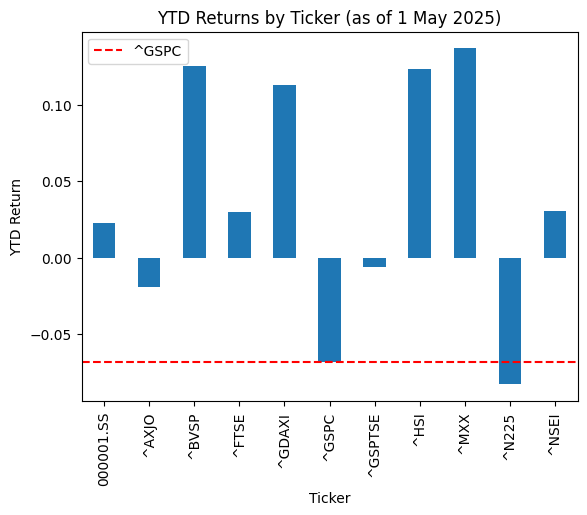

In [25]:
ytd_returns.plot(kind='bar', title='YTD Returns by Ticker (as of 1 May 2025)')
plt.axhline(y=gspc_return, color='r', linestyle='--', label='^GSPC')
plt.xlabel('Ticker')
plt.ylabel('YTD Return')
plt.legend()

## Question 3. [Index] S&P 500 Market Corrections Analysis

In [26]:
df_sp500 = yf.Ticker('^GSPC').history(start='1950-01-01')

In [27]:
df_sp500['cummax'] = df_sp500['Close'].cummax()
df_sp500['is_all_time_high'] = (df_sp500['Close'] == df_sp500['cummax'])

In [28]:
df_sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,cummax,is_all_time_high
Date,,,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0.0,0.0,16.660000,True
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0.0,0.0,16.850000,True
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0.0,0.0,16.930000,True
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0.0,0.0,16.980000,True
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0.0,0.0,17.080000,True
...,...,...,...,...,...,...,...,...,...
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0,6144.149902,False
2025-05-30 00:00:00-04:00,5903.669922,5922.140137,5843.660156,5911.689941,6378540000,0.0,0.0,6144.149902,False
2025-06-02 00:00:00-04:00,5896.680176,5937.399902,5861.430176,5935.939941,4832240000,0.0,0.0,6144.149902,False


In [30]:
# prompt: Identify all-time high points (where price exceeds all previous prices)
# For each pair of consecutive all-time highs, find the minimum price in between
# Calculate drawdown percentages: (high - low) / high × 100
# Filter for corrections with at least 5% drawdown
# Calculate the duration in days for each correction period
# Determine the 25th, 50th (median), and 75th percentiles for correction durations

def get_corrections_summary(df_sp500):
  all_time_highs_indices = df_sp500[df_sp500['is_all_time_high']].index
  corrections = []
  for i in range(len(all_time_highs_indices) - 1):
    start_date = all_time_highs_indices[i]
    end_date = all_time_highs_indices[i+1]
    period_between = df_sp500.loc[start_date:end_date]
    high_price = period_between.loc[start_date]['Close']
    min_price = period_between['Close'].min()

    drawdown = ((high_price - min_price) / high_price) * 100
    if drawdown >= 5:
      duration_days = (end_date - start_date).days
      corrections.append({'start_date': start_date, 'end_date': end_date, 'high': high_price, 'low': min_price, 'drawdown_pct': drawdown, 'duration_days': duration_days})

  corrections_df = pd.DataFrame(corrections)
  if not corrections_df.empty:
    durations = corrections_df['duration_days']
    percentiles = durations.quantile([0.25, 0.5, 0.75])
    return percentiles
  else:
    return pd.Series([], index=[0.25, 0.5, 0.75], name='duration_days')

correction_percentiles = get_corrections_summary(df_sp500)
correction_percentiles

,duration_days
0.25,56.0
0.50,94.0
0.75,213.5


## Question 4. [Stocks] Earnings Surprise Analysis for Amazon (AMZN)

In [39]:

# Step 1: Load earnings data
earnings_df = pd.read_csv("/ha1_Amazon.csv", delimiter=';')

# Convert Date to datetime objects, inferring the format
earnings_df['Date'] = pd.to_datetime(earnings_df['Earnings Date'], format='mixed', dayfirst=False, errors='coerce')

# Drop rows where date conversion failed
earnings_df = earnings_df.dropna(subset=['Date'])

# Step 2: Download historical price data for AMZN
amzn_data = yf.download('AMZN', progress=False)

# Step 3: Calculate 2-day percentage changes for all historical dates
# Access the 'Close' column correctly using the multi-level index
amzn_data['Close_Shifted_2D'] = amzn_data[('Close', 'AMZN')].shift(-2)

# Calculate the 2-day percentage change
amzn_data['2D_Pct_Change'] = (amzn_data['Close_Shifted_2D'] / amzn_data[('Close', 'AMZN')] - 1)

# Drop the shifted column as it's no longer needed
amzn_data = amzn_data.drop(columns=['Close_Shifted_2D'])

# Step 4: Identify positive earnings surprises
# Ensure EPS columns are numeric, coercing errors
earnings_df['actual EPS'] = pd.to_numeric(earnings_df['Reported EPS'], errors='coerce')
earnings_df['estimated EPS'] = pd.to_numeric(earnings_df['EPS Estimate'], errors='coerce')

# Drop rows where EPS conversion failed or are missing
earnings_df = earnings_df.dropna(subset=['actual EPS', 'estimated EPS'])

positive_surprises_df = earnings_df[earnings_df['actual EPS'] > earnings_df['estimated EPS']].copy()

# Step 5: Calculate 2-day percentage changes following positive earnings surprises
# Merge the earnings data with the stock price data based on Date
# We need to be careful with dates. The earnings date is the announcement date.
# The 2-day change should be calculated from the close price *before* the announcement
# or the day of the announcement, depending on when the price data reflects the news.
# Yahoo Finance data usually reflects the close price *after* the trading day.
# So, for an earnings date D, we look at the price on D and D+2.
# However, the prompt asks for Close_Day3 / Close_Day1 - 1, suggesting we need 3 consecutive days.
# Let's align the earnings date with Day 2. So, we need prices for Day 1 and Day 3.
# Day 1 is the day before the earnings announcement. Day 3 is the day after.

# Let's re-calculate the 2-day change relative to the day *before* the earnings date.
# We need to shift the index of amzn_data to align the earnings date with the price data.
# A simpler approach is to find the index of the earnings date in the price data and then look
# at the price two days later in the price data's index.

# Add a column to earnings_df to store the 2-day change
positive_surprises_df['2D_Pct_Change_After_Surprise'] = np.nan

for index, row in positive_surprises_df.iterrows():
    earnings_date = row['Date']

    # Find the trading day in amzn_data that is on or immediately after the earnings date
    # This is because earnings can be after market close, and the first price reaction
    # might be on the next trading day.
    price_index_after_earnings = amzn_data.index.searchsorted(earnings_date)

    # Ensure we have enough data points after the earnings date
    # Also ensure price_index_before_earnings + 2 is within bounds
    price_index_before_earnings = amzn_data.index.searchsorted(earnings_date) -1

    if price_index_after_earnings < len(amzn_data) - 2 and price_index_before_earnings >= 0 and price_index_before_earnings + 2 < len(amzn_data):
             # Access 'Close' price correctly using the multi-level index
             price_day1 = amzn_data.iloc[price_index_before_earnings][('Close', 'AMZN')]
             # Day 3 price: Price two trading days after Day 1
             price_day3 = amzn_data.iloc[price_index_before_earnings + 2][('Close', 'AMZN')]

             # Calculate the 2-day percentage change
             pct_change = (price_day3 / price_day1 - 1) * 100.0
             positive_surprises_df.loc[index, '2D_Pct_Change_After_Surprise'] = pct_change


# Remove rows where we couldn't calculate the 2-day change (e.g., insufficient data after the earnings date)
positive_surprises_df = positive_surprises_df.dropna(subset=['2D_Pct_Change_After_Surprise'])

# Calculate the median 2-day percentage change
median_2d_change = positive_surprises_df['2D_Pct_Change_After_Surprise'].median()

print(f"The median 2-day percentage change following positive earnings surprises is: {median_2d_change:.2f}%")

# Optional: Compare with median 2-day change for all historical dates
median_2d_change_all = amzn_data['2D_Pct_Change'].median()
print(f"The median 2-day percentage change for all historical dates is: {median_2d_change_all:.2f}%")

# Check the number of data points for positive surprises
num_positive_surprises = len(positive_surprises_df)
print(f"\nNumber of positive earnings surprises analyzed: {num_positive_surprises}")

<ipython-input-39-a7a41267a2fd>:18: FutureWarning: Parsed string "April 29, 2026 at 6 AM EDT" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  earnings_df['Date'] = pd.to_datetime(earnings_df['Earnings Date'], format='mixed', dayfirst=False, errors='coerce')
<ipython-input-39-a7a41267a2fd>:18: FutureWarning: Parsed string "February 4, 2026 at 4 PM EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  earnings_df['Date'] = pd.to_datetime(earnings_df['Earnings Date'], format='mixed', dayfirst=False, errors='coerce')
<ipython-input-39-a7a41267a2fd>:18: FutureWarning: Parsed string "October 29, 2025 at 6 AM EDT" included an un-r

The median 2-day percentage change following positive earnings surprises is: 2.01%
The median 2-day percentage change for all historical dates is: 0.00%

Number of positive earnings surprises analyzed: 33
